In [1]:
# Importing necessary libraries for visualization, modeling, and analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Define file paths
file_path_with_infertility = r"C:\Users\kanis\Downloads\PCOS_infertility.csv"
file_path_without_infertility = r"C:\Users\kanis\Downloads\PCOS_data_without_infertility.xlsx"

# Load data
PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

# Merge datasets based on 'Patient File No.'
data = pd.merge(PCOS_woinf, PCOS_inf, on='Patient File No.', suffixes=('', '_y'), how='left')

# Drop duplicated or unnecessary columns
columns_to_drop = ['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', 
                   '  I   beta-HCG(mIU/mL)_y', 'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y']
data = data.drop(columns=columns_to_drop, errors='ignore')

# Display first few rows
data.head()


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [4]:
import pandas as pd

# Load dataset 
summary_table = data.describe().T  # Transpose for better readability
summary_table[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]


,mean,std,min,25%,50%,75%,max
Sl. No,271.000000,156.317519,1.000000,136.000000,271.000000,406.000000,541.000000
Patient File No.,271.000000,156.317519,1.000000,136.000000,271.000000,406.000000,541.000000
PCOS (Y/N),0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
Age (yrs),31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
Weight (Kg),59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
Height(Cm),156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
Blood Group,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000


In [5]:
data.shape

(541, 44)

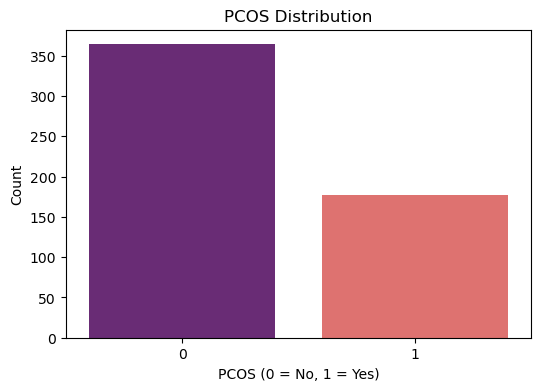

In [6]:
# Creating a count plot to visualize how many individuals have PCOS vs. those who don't
plt.figure(figsize=(6, 4))  # Set the plot size
sns.countplot(x='PCOS (Y/N)', data=data, palette='magma')  
plt.title("PCOS Distribution")  # Title for context
plt.xlabel("PCOS (0 = No, 1 = Yes)")  
plt.ylabel("Count")  # Label the y-axis
plt.show()  # Display the plot


In [7]:
# Calculate the percentage of individuals with and without PCOS
pcos_counts = data['PCOS (Y/N)'].value_counts(normalize=True) * 100
print(f"PCOS Positive: {pcos_counts[1]:.2f}%")  # Print percentage of positive cases
print(f"PCOS Negative: {pcos_counts[0]:.2f}%")  # Print percentage of negative cases


PCOS Positive: 32.72%
PCOS Negative: 67.28%


In [8]:
# Extract BMI values for PCOS and non-PCOS groups
bmi_pcos = data[data['PCOS (Y/N)'] == 1]['BMI']
bmi_non_pcos = data[data['PCOS (Y/N)'] == 0]['BMI']

# Calculate the average BMI for both groups
mean_pcos_bmi = np.mean(bmi_pcos)
mean_non_pcos_bmi = np.mean(bmi_non_pcos)

# Display average BMI comparison
print(f"Average BMI of PCOS Patients: {mean_pcos_bmi:.2f}")
print(f"Average BMI of Non-PCOS Patients: {mean_non_pcos_bmi:.2f}")


Average BMI of PCOS Patients: 25.47
Average BMI of Non-PCOS Patients: 23.75


In [9]:
# Perform a statistical t-test to compare LH (Luteinizing Hormone) levels between PCOS and non-PCOS groups
import scipy.stats as stats

lh_pcos = data[data['PCOS (Y/N)'] == 1]['LH(mIU/mL)']
lh_non_pcos = data[data['PCOS (Y/N)'] == 0]['LH(mIU/mL)']

t_stat, p_value = stats.ttest_ind(lh_pcos, lh_non_pcos, equal_var=False)  # Welch’s t-test used due to unequal variance
print(f"T-test for LH levels: p-value = {p_value:.5f}")  # A low p-value indicates significant difference

T-test for LH levels: p-value = 0.30189


In [10]:
# Repeat the t-test process for FSH (Follicle-Stimulating Hormone) levels
fsh_pcos = data[data['PCOS (Y/N)'] == 1]['FSH(mIU/mL)']
fsh_non_pcos = data[data['PCOS (Y/N)'] == 0]['FSH(mIU/mL)']

t_stat, p_value = stats.ttest_ind(fsh_pcos, fsh_non_pcos, equal_var=False)
print(f"T-test for FSH levels: p-value = {p_value:.5f}")  # Useful to detect hormonal differences


T-test for FSH levels: p-value = 0.31317


In [11]:
irregular_cycles_pcos = data[data['PCOS (Y/N)'] == 1]['Cycle(R/I)'].value_counts(normalize=True) * 100
irregular_cycles_non_pcos = data[data['PCOS (Y/N)'] == 0]['Cycle(R/I)'].value_counts(normalize=True) * 100

print(f"PCOS Patients - Irregular Cycles: {irregular_cycles_pcos.get(1, 0):.2f}%")
print(f"Non-PCOS Patients - Irregular Cycles: {irregular_cycles_non_pcos.get(1, 0):.2f}%")


PCOS Patients - Irregular Cycles: 0.00%
Non-PCOS Patients - Irregular Cycles: 0.00%


In [12]:
# Investigate pregnancy status among PCOS patients
# 'Pregnant(Y/N)' might indicate prior pregnancy experience

infertility_pcos = data[data['PCOS (Y/N)'] == 1]['Pregnant(Y/N)'].value_counts(normalize=True) * 100

# Print the proportion of PCOS patients who have and have not been pregnant
print(f"Percentage of PCOS patients who have been pregnant: {infertility_pcos.get(1, 0):.2f}%")
print(f"Percentage of PCOS patients who have not been pregnant: {infertility_pcos.get(0, 0):.2f}%")


Percentage of PCOS patients who have been pregnant: 36.16%
Percentage of PCOS patients who have not been pregnant: 63.84%


In [13]:
# Create a summary table to compare mean values of key metrics across PCOS and non-PCOS groups

comparison_table = data.groupby('PCOS (Y/N)')[[' Age (yrs)', 'BMI', 'LH(mIU/mL)', 'FSH(mIU/mL)', 'Vit D3 (ng/mL)']].mean()

# Replace the binary index with human-readable labels
comparison_table.index = ['Non-PCOS', 'PCOS']

# Display the resulting summary table
comparison_table


,Age (yrs),BMI,LH(mIU/mL),FSH(mIU/mL),Vit D3 (ng/mL)
Non-PCOS,32.065934,23.747397,2.612676,19.185956,29.295005
PCOS,30.124294,25.470919,14.402328,5.174593,92.322633


In [14]:
import pandas as pd

# Selecting relevant columns
features = [' Age (yrs)', 'BMI', 'LH(mIU/mL)', 'FSH(mIU/mL)', 'Vit D3 (ng/mL)']
summary_table = data[features].describe().T[['mean', '50%', 'std', 'min', 'max']]
summary_table.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']

# Display the table
summary_table


,Mean,Median,Std Dev,Min,Max
Age (yrs),31.430684,31.000000,5.411006,20.000000,48.00
BMI,24.311285,24.238227,4.056399,12.417882,38.90
LH(mIU/mL),6.469919,2.300000,86.673255,0.020000,2018.00
FSH(mIU/mL),14.601832,4.850000,217.022081,0.210000,5052.00
Vit D3 (ng/mL),49.915874,25.900000,346.206599,0.000000,6014.66


In [15]:
from scipy.stats import ttest_ind

# Defining PCOS & Non-PCOS groups
pcos_group = data[data['PCOS (Y/N)'] == 1]
non_pcos_group = data[data['PCOS (Y/N)'] == 0]

# Performing t-tests
t_test_results = {
    'Feature': ['LH(mIU/mL)', 'FSH(mIU/mL)', 'BMI', 'Vit D3 (ng/mL)'],
    'P-Value': [
        ttest_ind(pcos_group['LH(mIU/mL)'], non_pcos_group['LH(mIU/mL)'], nan_policy='omit').pvalue,
        ttest_ind(pcos_group['FSH(mIU/mL)'], non_pcos_group['FSH(mIU/mL)'], nan_policy='omit').pvalue,
        ttest_ind(pcos_group['BMI'], non_pcos_group['BMI'], nan_policy='omit').pvalue,
        ttest_ind(pcos_group['Vit D3 (ng/mL)'], non_pcos_group['Vit D3 (ng/mL)'], nan_policy='omit').pvalue
    ]
}

t_test_df = pd.DataFrame(t_test_results)
t_test_df


,Feature,P-Value
0,LH(mIU/mL),0.137845
1,FSH(mIU/mL),0.481596
2,BMI,0.000003
3,Vit D3 (ng/mL),0.046857


In [16]:
# Create a new binary column indicating Vitamin D deficiency status (threshold: < 20 ng/mL)
data['Vit D Deficient'] = data['Vit D3 (ng/mL)'] < 20

# Calculate percentage of Vitamin D deficient and sufficient individuals within PCOS and Non-PCOS groups
vit_d_table = data.groupby('PCOS (Y/N)')['Vit D Deficient'].value_counts(normalize=True) * 100

# Reshape the results to make it easier to interpret as a table
vit_d_table = vit_d_table.unstack()

vit_d_table.columns = ['Sufficient (%)', 'Deficient (%)']
vit_d_table.index = ['Non-PCOS', 'PCOS']  

# Display the percentage of Vitamin D sufficiency/deficiency in both groups
vit_d_table



,Sufficient (%),Deficient (%)
Non-PCOS,81.043956,18.956044
PCOS,71.751412,28.248588


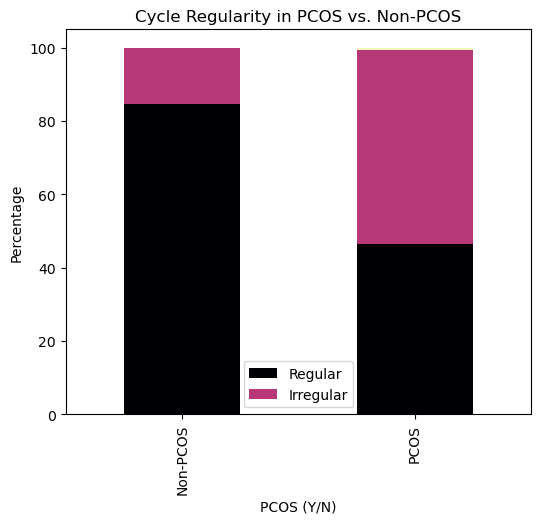

In [17]:
# Analyze cycle regularity (Regular vs Irregular) as a percentage within each PCOS class
cycle_counts = data.groupby('PCOS (Y/N)')['Cycle(R/I)'].value_counts(normalize=True).unstack() * 100

# Plot a stacked bar chart to compare cycle regularity between PCOS and Non-PCOS groups
cycle_counts.plot(
    kind='bar', 
    stacked=True, 
    colormap='magma', 
    figsize=(6,5)
)
plt.xticks([0,1], ['Non-PCOS', 'PCOS'])  # Label the x-axis ticks clearly
plt.ylabel("Percentage")
plt.title("Cycle Regularity in PCOS vs. Non-PCOS")
plt.legend(["Regular", "Irregular"])  
plt.show()


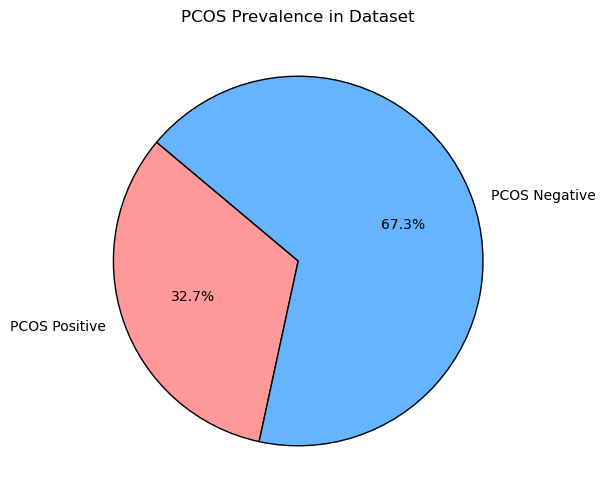

In [18]:
# Create a pie chart to visualize overall PCOS prevalence in the dataset

labels = ['PCOS Positive', 'PCOS Negative']  # Define pie segments
sizes = [32.72, 67.28]  
colors = ['#FF9999', '#66B3FF']  

plt.figure(figsize=(6,6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  # Show percentage values on pie
    colors=colors, 
    startangle=140,  # Rotate the pie 
    wedgeprops={'edgecolor': 'black'}  # black edge for better visibility
)
plt.title("PCOS Prevalence in Dataset")
plt.show()


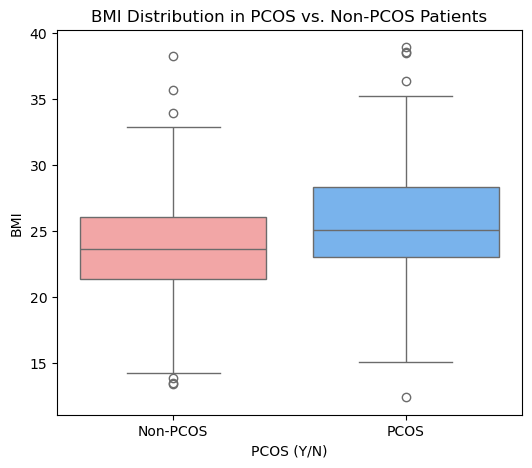

In [19]:
# Create a boxplot to visualize the distribution of BMI across PCOS and Non-PCOS patients

plt.figure(figsize=(6,5))
sns.boxplot(
    x='PCOS (Y/N)', 
    y='BMI', 
    data=data, 
    palette=['#FF9999', '#66B3FF'] 
)
plt.xticks([0,1], ['Non-PCOS', 'PCOS']) 
plt.title("BMI Distribution in PCOS vs. Non-PCOS Patients")  
plt.show()


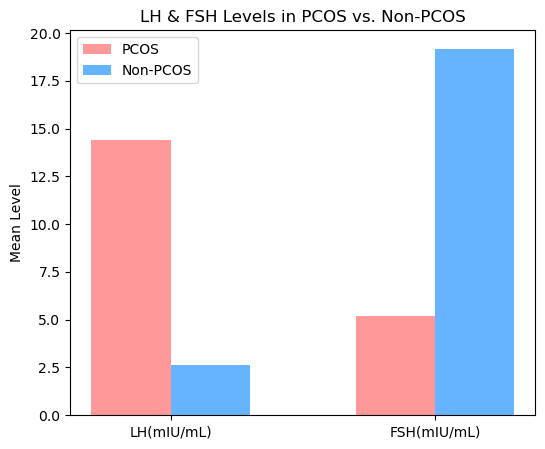

In [20]:
# Compare mean levels of two hormones (LH and FSH) between PCOS and Non-PCOS groups using a grouped bar chart

hormones = ['LH(mIU/mL)', 'FSH(mIU/mL)']  # Hormones of interest

# Calculate mean hormone levels for PCOS group
means_pcos = [
    data[data['PCOS (Y/N)'] == 1]['LH(mIU/mL)'].mean(), 
    data[data['PCOS (Y/N)'] == 1]['FSH(mIU/mL)'].mean()
]

# Do the same for Non-PCOS group
means_non_pcos = [
    data[data['PCOS (Y/N)'] == 0]['LH(mIU/mL)'].mean(), 
    data[data['PCOS (Y/N)'] == 0]['FSH(mIU/mL)'].mean()
]

x = np.arange(len(hormones))  # X-axis positions for bars
width = 0.3  

# Create the bar chart
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(x - width/2, means_pcos, width, label='PCOS', color='#FF9999')  # PCOS bars
ax.bar(x + width/2, means_non_pcos, width, label='Non-PCOS', color='#66B3FF')  # Non-PCOS bars

# Format the plot
ax.set_xticks(x)
ax.set_xticklabels(hormones)
ax.set_ylabel('Mean Level')
ax.set_title('LH & FSH Levels in PCOS vs. Non-PCOS')
ax.legend()
plt.show()


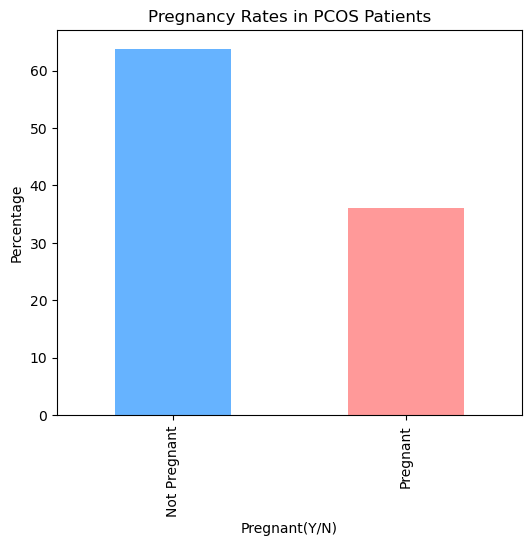

In [21]:
# Analyze pregnancy status distribution among PCOS patients

pregnancy_counts = data[data['PCOS (Y/N)'] == 1]['Pregnant(Y/N)'].value_counts(normalize=True) * 100

# Plot a simple bar chart to show pregnancy rates within PCOS patients
pregnancy_counts.plot(
    kind='bar', 
    color=['#66B3FF', '#FF9999'], 
    figsize=(6,5)
)
plt.xticks([0,1], ['Not Pregnant', 'Pregnant'])  
plt.ylabel("Percentage")
plt.title("Pregnancy Rates in PCOS Patients")
plt.show()



In [22]:
# Checking for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Marraige Status (Yrs)    1
Fast food (Y/N)          1
dtype: int64

In [23]:
# Handling missing values 
data.fillna(data.median(numeric_only=True), inplace=True)  # Filling numerical missing values with median


In [24]:
# Checking for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [25]:
# Checking for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

# Dropping duplicate rows
data = data.drop_duplicates()


Total duplicate rows: 0


In [26]:
from scipy.stats import zscore

# Calculating Z-scores
z_scores = data.select_dtypes(include=['number']).apply(zscore)

# Setting threshold (e.g., |z| > 3 indicates an outlier)
outliers = (z_scores.abs() > 3).sum()
print(outliers[outliers > 0])  # Display features with outliers


 Age (yrs)                 1
Weight (Kg)                3
Height(Cm)                 2
BMI                        4
Pulse rate(bpm)            2
RR (breaths/min)           3
Hb(g/dl)                   8
Cycle length(days)         9
Marraige Status (Yrs)      7
No. of aborptions         13
  I   beta-HCG(mIU/mL)     9
FSH(mIU/mL)                1
LH(mIU/mL)                 1
FSH/LH                     2
Hip(inch)                  3
Waist(inch)                3
TSH (mIU/L)                9
PRL(ng/mL)                 9
Vit D3 (ng/mL)             2
PRG(ng/mL)                 2
RBS(mg/dl)                 4
BP _Systolic (mmHg)        3
BP _Diastolic (mmHg)       3
Follicle No. (L)           6
Follicle No. (R)           6
Avg. F size (L) (mm)       8
Avg. F size (R) (mm)       5
Endometrium (mm)           6
dtype: int64


In [27]:
# Identifying categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Applying one-hot encoding for categorical features
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


In [28]:
from sklearn.preprocessing import StandardScaler

# Initializing the scaler
scaler = StandardScaler()

# Scaling numerical features
numerical_features = data.select_dtypes(include=['number']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])



Model: Random Forest
Accuracy : 0.9384
Precision: 0.9583
Recall   : 0.9200
F1-Score : 0.9388

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.96      0.92      0.94        75

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146



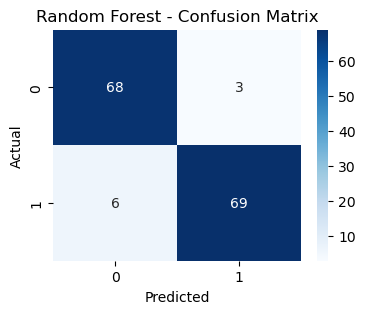


Model: Decision Tree
Accuracy : 0.8493
Precision: 0.8955
Recall   : 0.8000
F1-Score : 0.8451

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        71
           1       0.90      0.80      0.85        75

    accuracy                           0.85       146
   macro avg       0.85      0.85      0.85       146
weighted avg       0.85      0.85      0.85       146



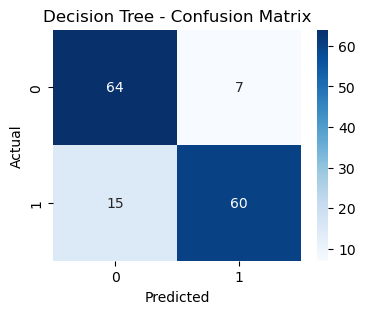


Model: Gaussian NB
Accuracy : 0.7329
Precision: 0.6667
Recall   : 0.9600
F1-Score : 0.7869

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.49      0.64        71
           1       0.67      0.96      0.79        75

    accuracy                           0.73       146
   macro avg       0.79      0.73      0.71       146
weighted avg       0.79      0.73      0.72       146



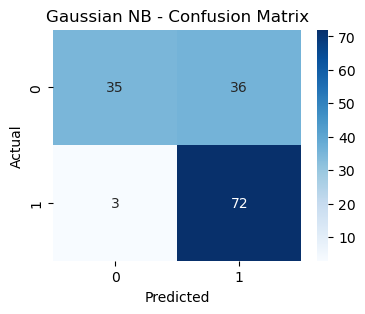


Model: Logistic Regression
Accuracy : 0.9110
Precision: 0.9079
Recall   : 0.9200
F1-Score : 0.9139

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        71
           1       0.91      0.92      0.91        75

    accuracy                           0.91       146
   macro avg       0.91      0.91      0.91       146
weighted avg       0.91      0.91      0.91       146



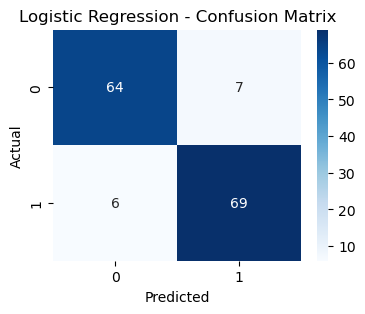

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure target column is in correct format
data['PCOS (Y/N)'] = data['PCOS (Y/N)'].astype(int)

# Features and target
X = data.drop(columns=['PCOS (Y/N)'])
y = data['PCOS (Y/N)']

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian NB': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear')
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [30]:
from sklearn.feature_selection import VarianceThreshold

# Removing low-variance features
selector = VarianceThreshold(threshold=0.01)  # Adjust the threshold as needed
data = pd.DataFrame(selector.fit_transform(data), columns=data.columns[selector.get_support()])


Epoch 1/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1443 - val_loss: 0.1340
Epoch 2/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1046 - val_loss: 0.1140
Epoch 3/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0832 - val_loss: 0.0984
Epoch 4/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0713 - val_loss: 0.0899
Epoch 5/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0690 - val_loss: 0.0846
Epoch 6/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0614 - val_loss: 0.0788
Epoch 7/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0577 - val_loss: 0.0733
Epoch 8/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0556 - val_loss: 0.0685
Epoch 9/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0521 - val_loss: 0.0642
Epoch 10/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0524 - val_loss: 0.0599
Epoch 11/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0481 - val_loss: 0.0567
Epoch 12/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Epoch 69/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 70/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0222 - val_loss: 0.0229
Epoch 71/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0232 - val_loss: 0.0227
Epoch 72/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0236 - val_loss: 0.0226
Epoch 73/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227 - val_loss: 0.0226
Epoch 74/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 75/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0230 - val_loss: 0.0225
Epoch 76/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0224 - val_loss: 0.0227
Epoch 77/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0243 - val_loss: 0.0223
Epoch 78/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0219 - val_loss: 0.0225
Epoch 79/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0230 - val_loss: 0.0226
Epoch 80/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/st

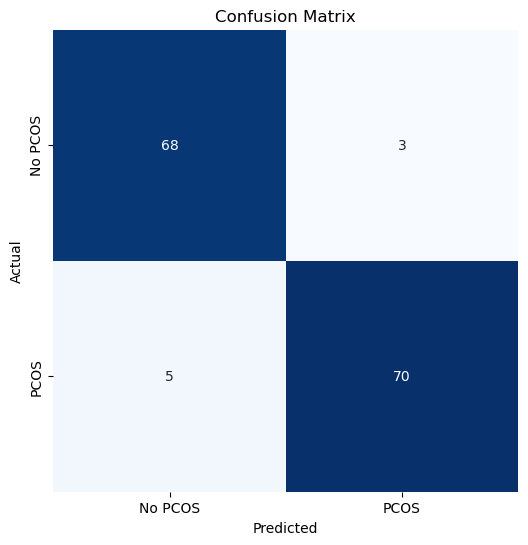

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.96      0.93      0.95        75

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146



In [47]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Preprocess the Data

# data types
data['PCOS (Y/N)'] = data['PCOS (Y/N)'].astype(int)

# Fill missing values
data = data.fillna(0)

# Split into features and target
X = data.drop(columns=['PCOS (Y/N)'])
y = data['PCOS (Y/N)']

#  feature columns are float32
X = X.astype('float32')


# Handle Class Imbalance with SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert to NumPy arrays for TensorFlow
X_train = X_train.to_numpy().astype('float32')
X_test = X_test.to_numpy().astype('float32')


# Define Autoencoder for Feature Extraction

input_dim = X_train.shape[1]
encoding_dim = 64  # Compressed feature size

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(128)(input_layer)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.3)(encoded)
encoded = Dense(encoding_dim)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)

# Decoder
decoded = Dense(128)(encoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Models
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile and Train Autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_logarithmic_error')

autoencoder.fit(
    X_train, X_train,
    epochs=120,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test, X_test),
    verbose=1
)


# Extract Features Using Encoder

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)


# Train Random Forest Classifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_encoded, y_train)

# Predict and Evaluate
y_pred_rf = rf_model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Hybrid Model Accuracy:", accuracy)


# Evaluation Metrics

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No PCOS', 'PCOS'],
            yticklabels=['No PCOS', 'PCOS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


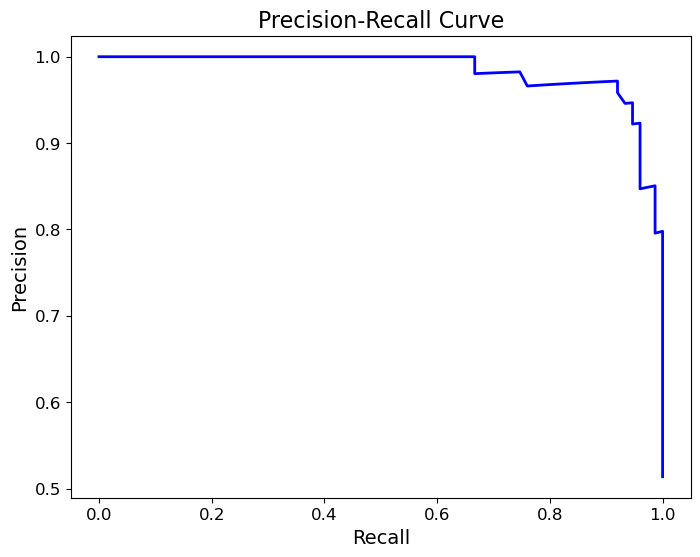

In [32]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test_encoded)[:, 1])

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


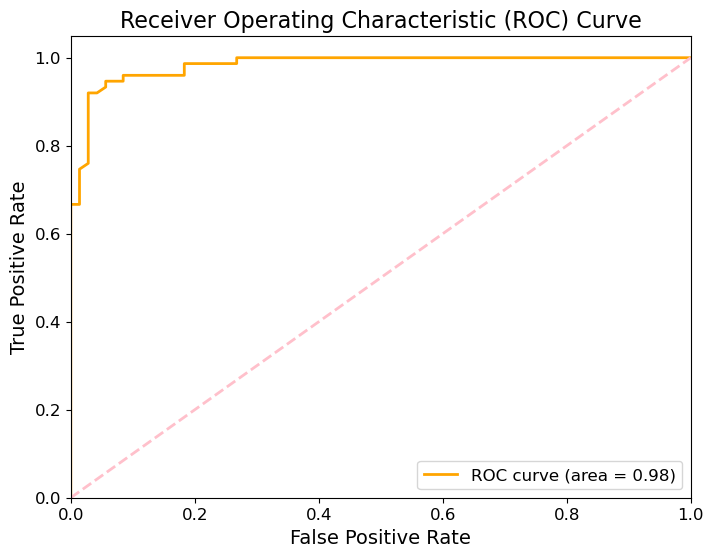

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_encoded)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


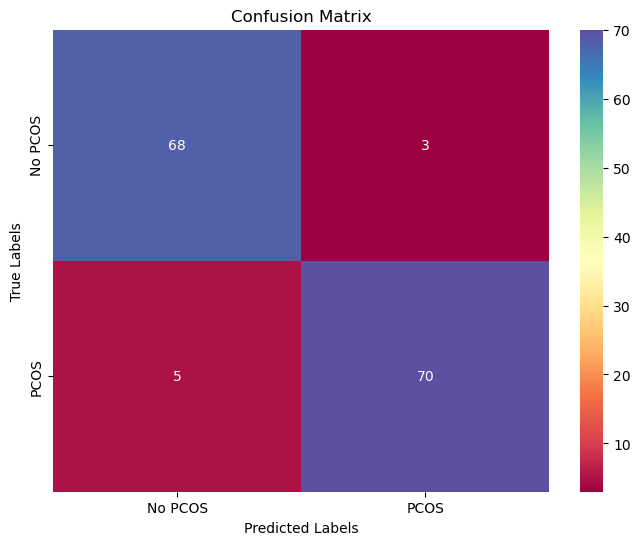

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test_encoded))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

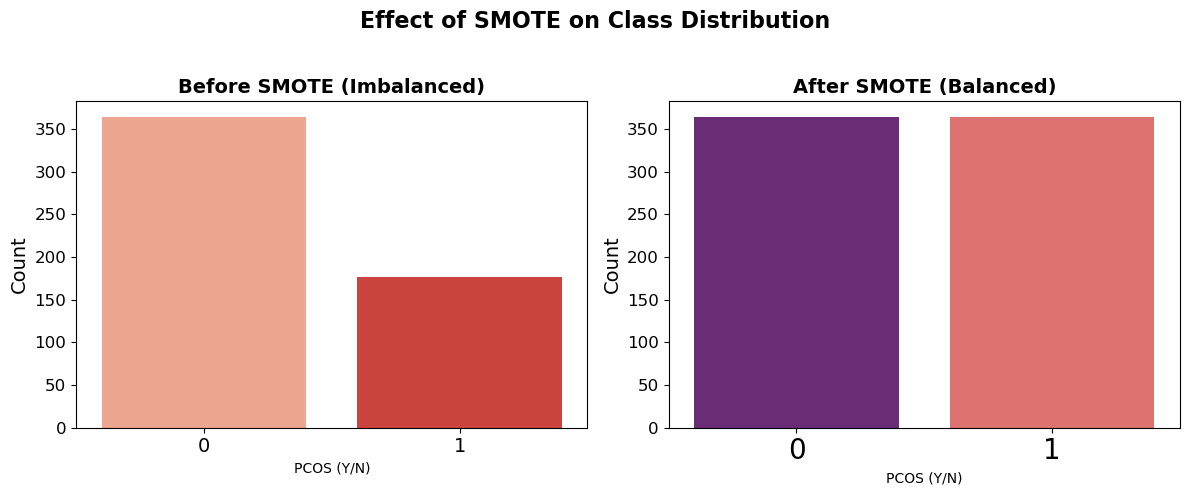

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Effect of SMOTE on Class Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y, ax=axes[0], palette='Reds')
axes[0].set_title('Before SMOTE (Imbalanced)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].tick_params(axis='x', labelsize=14)  # Increase x-axis tick label size

sns.countplot(x=y_resampled, ax=axes[1], palette='magma')
axes[1].set_title('After SMOTE (Balanced)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].tick_params(axis='x', labelsize=20)  # Increase x-axis tick label size

plt.suptitle('Effect of SMOTE on Class Distribution', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()
